# Hypothesis

- People are more likely to shop online after working hours.
- People are more likely to shop during weekends.
- People are more likely to shop in certain months of the year (i.e. Christmas season), each individual countries’ end of year sales, etc.
- Low unit value items are more likely to be a top 5 sales item in each country.


In [194]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [129]:
# Filepath of the CSV files
csv_path_1 ='Resources/Year 2009-2010.csv'
csv_path_2 ='Resources/Year 2010-2011.csv'

# Read through CSV files via Pandas
df1=pd.read_csv(csv_path_1, encoding="ISO-8859-1")
df2=pd.read_csv(csv_path_2, encoding="ISO-8859-1")

# Merge the files
dataset = df1.append([df2])

# Display dataframe
dataset

,ï»¿Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/11 12:50,2.10,12680.00,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/11 12:50,4.15,12680.00,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/11 12:50,4.15,12680.00,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,9/12/11 12:50,4.95,12680.00,France


In [130]:
# Check out the dataframe using describe and info
dataset.describe()

,Quantity,Price,Customer ID
count,1067371.00,1067371.00,824364.00
mean,9.94,4.65,15324.64
std,172.71,123.55,1697.46
min,-80995.00,-53594.36,12346.00
25%,1.00,1.25,13975.00
50%,3.00,2.10,15255.00
75%,10.00,4.15,16797.00
max,80995.00,38970.00,18287.00


In [131]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ï»¿Invoice   1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 73.3+ MB


In [132]:
dataset.keys()

Index(['ï»¿Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [133]:
dataset.count()

ï»¿Invoice     1067371
StockCode      1067371
Description    1062989
Quantity       1067371
InvoiceDate    1067371
Price          1067371
Customer ID     824364
Country        1067371
dtype: int64

Number of customer IDs being less than invoices means that some people did not register and checked out as a guest.

In [134]:
dataset.keys()

Index(['ï»¿Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [135]:
dataset['ï»¿Invoice'] = dataset['ï»¿Invoice'].astype(str)
dataset['StockCode'] = dataset['StockCode'].astype(str)
dataset['Description'] = dataset['Description'].astype(str)
dataset['InvoiceDate'] = dataset['InvoiceDate'].astype(str)
dataset['Country'] = dataset['Country'].astype(str)
dataset['Customer ID'] = dataset['Customer ID'].astype(str)

In [136]:
dataset=dataset.rename(columns= {"ï»¿Invoice":"Invoice Number",
                         "StockCode": "Stock Code",
                         "InvoiceDate": "Invoice Date",
                         })

In [137]:
grouped_data= dataset.groupby("Country")
grouped_data.count()

,Invoice Number,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID
Country,,,,,,,
Australia,1913,1913,1913,1913,1913,1913,1913
Austria,938,938,938,938,938,938,938
Bahrain,126,126,126,126,126,126,126
Belgium,3123,3123,3123,3123,3123,3123,3123
Bermuda,34,34,34,34,34,34,34
Brazil,94,94,94,94,94,94,94
Canada,228,228,228,228,228,228,228
Channel Islands,1664,1664,1664,1664,1664,1664,1664
Cyprus,1176,1176,1176,1176,1176,1176,1176


In [138]:
#This is to split the date and time out as separate date and time

dataset['Date'] = pd.to_datetime(dataset['Invoice Date']).dt.date
dataset['Time'] = pd.to_datetime(dataset['Invoice Date']).dt.time
dataset.head()

,Invoice Number,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID,Country,Date,Time
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom,2009-01-12,07:45:00
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,07:45:00
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,07:45:00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom,2009-01-12,07:45:00
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom,2009-01-12,07:45:00


In [139]:
#This is to convert the dates to datetime format and then converting the date to day of the week
dataset["day-of-week"] = dataset['Date'].dt.weekday_name()
dataset.head()

AttributeError: Can only use .dt accessor with datetimelike values

Weekend vs. weekdays - Nich

# Shopping trends by month and year for each country - Samra

annual increase/decrease - Zach

In [140]:
dataset["Year"] = pd.DatetimeIndex(dataset["Date"]).year

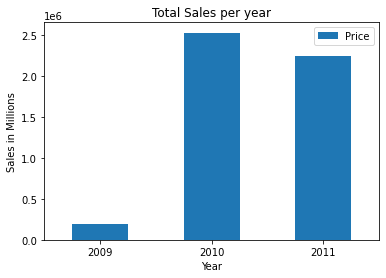

In [158]:
annual_sales = pd.set_option('display.float_format', lambda x: '%.2f' % x)
annual_sales = dataset.groupby(["Year"]).agg({'Price': 'sum'})
annual_sales_chart = annual_sales.plot.bar(rot=0, title="Total Sales per year", ylabel="Sales in Millions")

<AxesSubplot:title={'center':'Total Volume sold per year'}, xlabel='Year', ylabel='Quantity in Millions'>

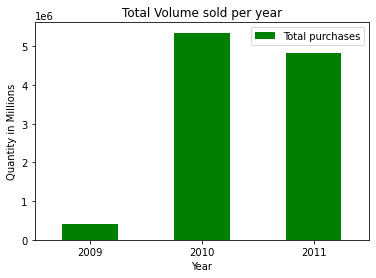

In [159]:
annual_sales["Total purchases"] = dataset.groupby(["Year"]).agg({'Quantity': 'sum'})
annual_sales = annual_sales.drop(columns="Price")
annual_sales.plot.bar(rot=0, title="Total Volume sold per year", color="green",ylabel="Quantity in Millions", width=0.5)

<AxesSubplot:title={'center':'Average purchase made'}, xlabel='Year', ylabel='Price'>

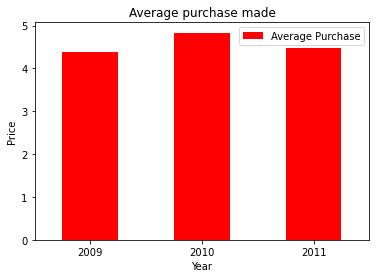

In [160]:
annual_sales["Average Purchase"] = dataset.groupby(["Year"]).agg({'Price': 'mean'})
annual_sales = annual_sales.drop(columns="Total purchases")
annual_sales.plot.bar(rot=0, title="Average purchase made", color="red",ylabel="Price")

<AxesSubplot:title={'center':'Average volume of purchase'}, xlabel='Year', ylabel='Volume'>

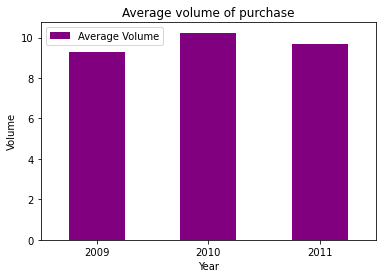

In [162]:
annual_sales["Average Volume"] = dataset.groupby(["Year"]).agg({'Quantity': 'mean'})

annual_sales = annual_sales.drop(columns="Average Purchase")
annual_sales.plot.bar(rot=0, title="Average volume of purchase", color="purple",ylabel="Volume")

# Customer with highest purchase quantity and $ amount - Zach

In [169]:
customer_sales_data = annual_sales = pd.set_option('display.float_format', lambda x: '%.2f' % x)
annual_sales = dataset.groupby(["Customer ID"]).agg({'Price': 'sum'})
annual_sales["Volume"] = dataset.groupby(["Customer ID"]).agg({'Quantity': 'sum'})
annual_sales = annual_sales.drop("nan")
annual_sales


,Price,Volume
Customer ID,,
12346.0,580.44,52
12347.0,644.16,3286
12348.0,193.10,2714
12349.0,1504.59,1619
12350.0,65.30,197
...,...,...
18283.0,1719.75,1733
18284.0,116.09,493
18285.0,100.20,145


In [170]:
annual_sales = annual_sales.sort_values(by='Price', ascending=False)
annual_sales

,Price,Volume
Customer ID,,
14911.0,71343.06,143741
14096.0,41376.33,16335
15098.0,40278.90,60
14063.0,39920.95,3846
14156.0,36432.32,163910
...,...,...
14033.0,0.19,576
15118.0,0.17,1440
14827.0,0.00,5


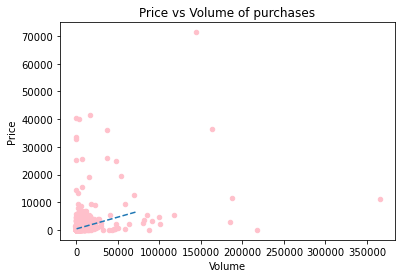

In [230]:
scatterplot = annual_sales.plot.scatter(x="Volume", y="Price", color="pink", title="Price vs Volume of purchases")
x = annual_sales["Volume"]
y = annual_sales["Price"]

as_slope, as_int, as_r, as_p, as_std_err = stats.linregress(x, y)
as_fit = as_slope * y + as_int
plt.plot(y,as_fit,"--")
plt.show()

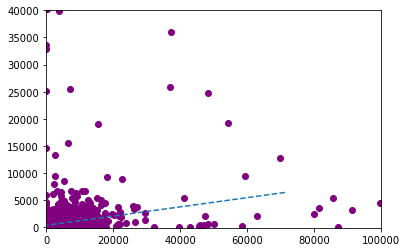

In [229]:
x = annual_sales["Volume"]
y = annual_sales["Price"]
scatterplot2 = plt.scatter(x=x, y=y, color="purple", vmax=40000, title="Price vs Volume of purchases")
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(x, y)
m_fit = m_slope * y + m_int
plt.plot(y,m_fit,"--")
plt.xlim(-100,100000)
plt.ylim(-100,40000)
plt.show()


In [189]:
quartiles = annual_sales["Price"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
print(quartiles)
print(iqr)
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)

0.25    66.53
0.50   174.12
0.75   464.68
Name: Price, dtype: float64
398.1424999999998
-530.6787499999997
1061.8912499999994


<AxesSubplot:>

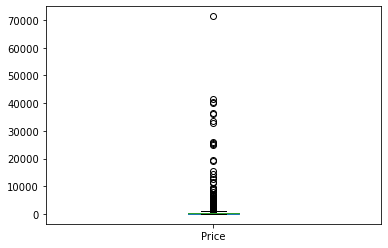

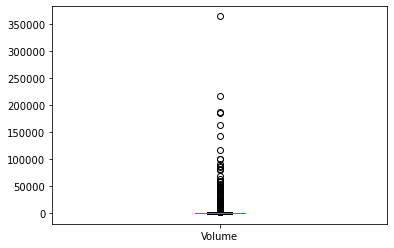

In [206]:
annual_sales.plot.box(x="Volume")
annual_sales.plot.box(x="Price")

In [190]:
quartiles = annual_sales["Volume"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
print(quartiles)
print(iqr)
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)

0.25    180.00
0.50    474.00
0.75   1340.75
Name: Volume, dtype: float64
1160.75
-1561.125
3081.875


# Most popular item by country and overall - Miley

Heatmap of sales vs. country - Miley

Time of the day with highest sale volume - Samra

Whether people are more likely to shop online during a certain time of the day or weekdays/weekends.

Whether people are more likely to shop in certain months of the year (i.e. Christmas season), each individual countries’ end of year sales, etc.

Whether low unit value items are more likely to be a top 5 sales item in each country.